In [1]:
%load_ext autoreload
%autoreload 2

# Use HuggingFace's datasets library to access the financial_phrasebank dataset
from datasets import load_dataset

In [2]:
dataset = load_dataset(
    "financial_phrasebank", 
    'sentences_50agree' # Select variation of the dataset
)

print(f'The dataset is a dictionary with two splits: \n\n{dataset}')

Reusing dataset financial_phrasebank (C:\Users\Lakshmikanth Loya\.cache\huggingface\datasets\financial_phrasebank\sentences_50agree\1.0.0\a6d468761d4e0c8ae215c77367e1092bead39deb08fbf4bffd7c0a6991febbf0)


  0%|          | 0/1 [00:00<?, ?it/s]

The dataset is a dictionary with two splits: 

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label'],
        num_rows: 4846
    })
})


In [3]:
dataset

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label'],
        num_rows: 4846
    })
})

# Splitting the Data

In [4]:
from sklearn.model_selection import train_test_split

# Split test data from training data
train_sentences, test_sentences, train_labels, test_labels = train_test_split(
    dataset["train"]['sentence'], 
    dataset["train"]['label'], 
    test_size=0.2,
    random_state=42,
    stratify=dataset["train"]['label']  # make sure the same proportion of labels is in the test set and training set
)

In [5]:
# label 0 = negative, 1 = neutral, 2 = positive
print(f'How many instances in the train dataset? \n\n{len(train_sentences)}')
print('')
print(f'What does one instance look like? \n\n{train_sentences[234]}')

How many instances in the train dataset? 

3876

What does one instance look like? 

In the meantime the CEO 's duties will be assumed by Outotec 's Deputy CEO Seppo Rantakari .


In [6]:
train_sentences[0]

'The major breweries increased their domestic beer sales by 4.5 per cent last year , to 256.88 million litres from 245.92 million litres in 2004 .'

# Train Test Split


In [7]:
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_sentences, train_labels, test_size=0.25, stratify=train_labels,random_state=42)


In [8]:
count=0
for i in range(len(train_labels)):
    if train_labels[i]=='1':
        count=count+1

In [9]:
x1=train_labels.count(0)
x1

362

In [10]:
x2=train_labels.count(2)
x2

818

In [11]:
x3=train_labels.count(1)
x3

1727

In [12]:
print(f'How many instances in the validation dataset? \n\n{len(val_sentences)}\n')
print(f'How many instances in the test dataset? \n\n{len(test_sentences)}')

How many instances in the validation dataset? 

969

How many instances in the test dataset? 

970


In [13]:
len(train_sentences)

2907

To extract a bag of words, we can use the CountVectorizer class ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)).
This class outputs the bag of words as a feature vector, where the length of the vector is equal to the size of the vocabulary, and the values are the counts of each words in a document. 



In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize

# CountVectorizer can do its own tokenization, but for consistency we want to
# carry on using WordNetTokenizer. We write a small wrapper class to enable this:
class Tokenizer(object):
    def __call__(self, Sentence):
        return word_tokenize(Sentence)

vectorizer = CountVectorizer(tokenizer=Tokenizer())  # construct the vectorizer

vectorizer.fit(train_sentences)  # Learn the vocabulary
X_train = vectorizer.transform(train_sentences)  # extract training set bags of words
X_test = vectorizer.transform(val_sentences)  # extract test set bags of words

C:\Users\Lakshmikanth Loya\anaconda3\envs\data_analytics\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [15]:
train_sentences[0]

'Finnish electronics contract manufacturer Scanfil had net sales of EUR 52.2 mn in the first quarter of 2007 , down from EUR 60.1 mn a year before .'

In [16]:
v=vectorizer.vocabulary_
v

{'finnish': 3750,
 'electronics': 3215,
 'contract': 2631,
 'manufacturer': 5238,
 'scanfil': 7076,
 'had': 4118,
 'net': 5637,
 'sales': 7011,
 'of': 5800,
 'eur': 3371,
 '52.2': 1026,
 'mn': 5464,
 'in': 4407,
 'the': 7936,
 'first': 3763,
 'quarter': 6543,
 '2007': 607,
 ',': 30,
 'down': 3058,
 'from': 3897,
 '60.1': 1089,
 'a': 1316,
 'year': 8705,
 'before': 1902,
 '.': 57,
 'agreement': 1467,
 'includes': 4422,
 'entire': 3297,
 'process': 6407,
 'managing': 5224,
 'mercator': 5355,
 "'s": 12,
 'supply': 7711,
 'chain': 2304,
 'all': 1514,
 'regions': 6704,
 'where': 8569,
 'company': 2502,
 'is': 4618,
 'currently': 2753,
 'present': 6356,
 'platen': 6227,
 'edges': 3166,
 'contact': 2613,
 'with': 8623,
 'band': 1839,
 'are': 1670,
 'provided': 6490,
 'seal': 7110,
 'having': 4179,
 'protrusion': 6484,
 'directed': 2966,
 'towards': 8064,
 'middle': 5414,
 'area': 1671,
 'and': 1587,
 'means': 5313,
 'to': 8018,
 'exert': 3553,
 'maintain': 5190,
 'pressure': 6365,
 'volume': 

In [17]:
print(len(train_sentences))
print(X_train)


2907
  (0, 30)	1
  (0, 57)	1
  (0, 607)	1
  (0, 1026)	1
  (0, 1089)	1
  (0, 1316)	1
  (0, 1902)	1
  (0, 2631)	1
  (0, 3058)	1
  (0, 3215)	1
  (0, 3371)	2
  (0, 3750)	1
  (0, 3763)	1
  (0, 3897)	1
  (0, 4118)	1
  (0, 4407)	1
  (0, 5238)	1
  (0, 5464)	2
  (0, 5637)	1
  (0, 5800)	2
  (0, 6543)	1
  (0, 7011)	1
  (0, 7076)	1
  (0, 7936)	1
  (0, 8705)	1
  :	:
  (2905, 3977)	1
  (2905, 4148)	1
  (2905, 4169)	1
  (2905, 4181)	1
  (2905, 4407)	1
  (2905, 4472)	1
  (2905, 5338)	1
  (2905, 5705)	1
  (2905, 5723)	1
  (2905, 5746)	1
  (2905, 5800)	1
  (2905, 6615)	1
  (2905, 7935)	1
  (2905, 7936)	3
  (2905, 8257)	1
  (2905, 8599)	1
  (2906, 57)	1
  (2906, 2752)	1
  (2906, 3686)	1
  (2906, 4646)	1
  (2906, 5028)	1
  (2906, 5223)	1
  (2906, 8421)	1
  (2906, 8550)	1
  (2906, 8623)	1


### Here (x1,x2) y
- x1= sentence number 
- x2= Index of the word
- y= Number of occurence of the word in the sentence.

The fit() method sets the vectorizer up by extracting a vocabulary from some text data. 

QUESTION: Why do we fit the CountVectorizer on the training set?

The vectorizer stores the vocabulary as a dictionary that maps a token to its index in the feature vector. The code below looks up the indexes of some example words:

In [18]:
import reprlib

vocabulary = vectorizer.vocabulary_
print(vocabulary['the'])
print(vocabulary['cover'])


print(f'Vocabulary size = {len(vocabulary)}')

7936
2708
Vocabulary size = 8748


# Naive Base Classifier

In [19]:
from sklearn.naive_bayes import MultinomialNB


classifier = MultinomialNB()
classifier.fit(X_train, train_labels)

MultinomialNB()

In [20]:
y_test_pred = classifier.predict(X_test)

In [21]:
# WRITE YOUR CODE HERE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
acc = accuracy_score(val_labels, y_test_pred)
print(f'Accuracy = {acc}')

prec = precision_score(val_labels, y_test_pred, average='macro')
print(f'Precision (macro average) = {prec}')

rec = recall_score(val_labels, y_test_pred, average='macro')
print(f'Recall (macro average) = {rec}')

f1 = f1_score(val_labels, y_test_pred, average='macro')
print(f'F1 score (macro average) = {f1}')
clf_report= classification_report(val_labels, y_test_pred, output_dict=True)
print(classification_report(val_labels, y_test_pred))

Accuracy = 0.7265221878224974
Precision (macro average) = 0.7042792487536422
Recall (macro average) = 0.5775913097102937
F1 score (macro average) = 0.6065874303893758
              precision    recall  f1-score   support

           0       0.73      0.30      0.42       121
           1       0.76      0.91      0.83       576
           2       0.61      0.52      0.56       272

    accuracy                           0.73       969
   macro avg       0.70      0.58      0.61       969
weighted avg       0.72      0.73      0.71       969



<AxesSubplot:>

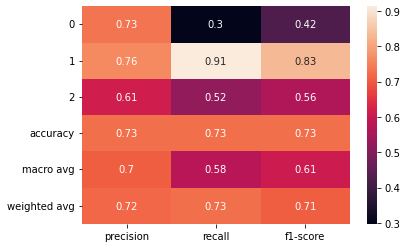

In [22]:
import seaborn as sns
import pandas as pd

sns.heatmap(pd.DataFrame(clf_report).iloc[:-1,:].T, annot=True)

<AxesSubplot:>

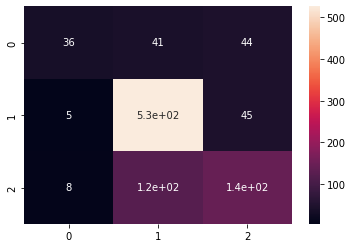

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
sns.heatmap(confusion_matrix(val_labels, y_test_pred), annot=True)

# 3. Logistic Regression Classifier

Another simple, linear classifier is logistic regression. This classifier does not rely on the conditional independence assumption, so can better model features that are highly correlated with each other. Scikit-learn provides the [logisticRegression class](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), which has a very similar interface to the naïve Bayes classifier.


In [24]:
len(train_labels)

2907

In [25]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter= 1000)
classifier.fit(X_train, train_labels)

LogisticRegression(max_iter=1000)

In [26]:
y_test_pred = classifier.predict(X_test)

In [27]:
# WRITE YOUR CODE HERE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
acc = accuracy_score(val_labels, y_test_pred)
print(f'Accuracy = {acc}')

prec = precision_score(val_labels, y_test_pred, average='macro')
print(f'Precision (macro average) = {prec}')

rec = recall_score(val_labels, y_test_pred, average='macro')
print(f'Recall (macro average) = {rec}')

f1 = f1_score(val_labels, y_test_pred, average='macro')
print(f'F1 score (macro average) = {f1}')
clf_report= classification_report(val_labels, y_test_pred, output_dict=True)
print(classification_report(val_labels, y_test_pred))

Accuracy = 0.7574819401444789
Precision (macro average) = 0.7440665709749679
Recall (macro average) = 0.6612332662633464
F1 score (macro average) = 0.6913956326409126
              precision    recall  f1-score   support

           0       0.78      0.51      0.62       121
           1       0.79      0.89      0.84       576
           2       0.67      0.58      0.62       272

    accuracy                           0.76       969
   macro avg       0.74      0.66      0.69       969
weighted avg       0.75      0.76      0.75       969



<AxesSubplot:>

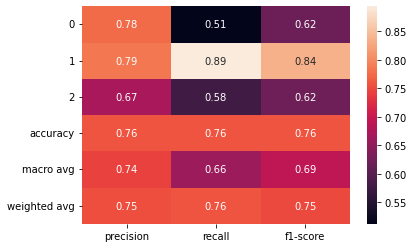

In [28]:

sns.heatmap(pd.DataFrame(clf_report).iloc[:-1,:].T, annot=True)

<AxesSubplot:>

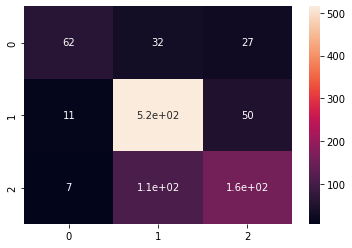

In [29]:

import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(val_labels, y_test_pred), annot=True)

Here we got good scores i.e aorund 75% of accuracy.

# Performing our model on certain words

In [30]:

print(classifier.coef_[:, vocabulary['happy']])
print(classifier.coef_[:, vocabulary['wonderful']])
print('positions [0 1 2]= [negative neutral positive]')

[-0.14004089 -0.25707766  0.39711855]
[-0.00227405 -0.12325071  0.12552476]
positions [0 1 2]= [negative neutral positive]


# 4. Lemmatization
In the previous lab, we tried out lemmatization. This is useful for reducing the size of the vocabulary. Could it help us here?

To apply lemmatization, we have to go back to the CountVectorizer and define a new tokenizer that will carry out the extra step of lemmatization. Run the code below to test this out:

In [31]:
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 

class LemmaTokenizer(object):
    
    def __init__(self):
        self.wnl = WordNetLemmatizer()
        
    def __call__(self, Sentence):
        return [self.wnl.lemmatize(self.wnl.lemmatize(self.wnl.lemmatize(tok, pos='n'), pos='v'), pos='a') for tok in word_tokenize(Sentence)]
    
vectorizer = CountVectorizer(tokenizer=LemmaTokenizer())

vectorizer.fit(train_sentences)
X_train = vectorizer.transform(train_sentences)
X_test = vectorizer.transform(val_sentences)

# Print out some of the features in the vocabulary:
print(list(vectorizer.vocabulary_)[:20])

C:\Users\Lakshmikanth Loya\anaconda3\envs\data_analytics\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


['finnish', 'electronics', 'contract', 'manufacturer', 'scanfil', 'have', 'net', 'sale', 'of', 'eur', '52.2', 'mn', 'in', 'the', 'first', 'quarter', '2007', ',', 'down', 'from']


In [32]:
print(f'Vocabulary size: {len(vectorizer.vocabulary_)}')

Vocabulary size: 7396


In [33]:
v

{'finnish': 3750,
 'electronics': 3215,
 'contract': 2631,
 'manufacturer': 5238,
 'scanfil': 7076,
 'had': 4118,
 'net': 5637,
 'sales': 7011,
 'of': 5800,
 'eur': 3371,
 '52.2': 1026,
 'mn': 5464,
 'in': 4407,
 'the': 7936,
 'first': 3763,
 'quarter': 6543,
 '2007': 607,
 ',': 30,
 'down': 3058,
 'from': 3897,
 '60.1': 1089,
 'a': 1316,
 'year': 8705,
 'before': 1902,
 '.': 57,
 'agreement': 1467,
 'includes': 4422,
 'entire': 3297,
 'process': 6407,
 'managing': 5224,
 'mercator': 5355,
 "'s": 12,
 'supply': 7711,
 'chain': 2304,
 'all': 1514,
 'regions': 6704,
 'where': 8569,
 'company': 2502,
 'is': 4618,
 'currently': 2753,
 'present': 6356,
 'platen': 6227,
 'edges': 3166,
 'contact': 2613,
 'with': 8623,
 'band': 1839,
 'are': 1670,
 'provided': 6490,
 'seal': 7110,
 'having': 4179,
 'protrusion': 6484,
 'directed': 2966,
 'towards': 8064,
 'middle': 5414,
 'area': 1671,
 'and': 1587,
 'means': 5313,
 'to': 8018,
 'exert': 3553,
 'maintain': 5190,
 'pressure': 6365,
 'volume': 

In [34]:
logreg= LogisticRegression()
logreg.fit(X_train, train_labels)

y_test_pred = logreg.predict(X_test)

target_names = ['class 0', 'class 1', 'class 2']

acc = accuracy_score(val_labels, y_test_pred)
print(f'Accuracy = {acc}')

prec = precision_score(val_labels, y_test_pred, average='macro')
print(f'Precision (macro average) = {prec}')

rec = recall_score(val_labels, y_test_pred, average='macro')
print(f'Recall (macro average) = {rec}')

f1 = f1_score(val_labels, y_test_pred, average='macro')
print(f'F1 score (macro average) = {f1}')
clf_report= classification_report(val_labels, y_test_pred, output_dict=True)
print(classification_report( val_labels , y_test_pred, target_names = target_names  ))

Accuracy = 0.759545923632611
Precision (macro average) = 0.7322131367853905
Recall (macro average) = 0.6643310331478781
F1 score (macro average) = 0.6902458652818776
              precision    recall  f1-score   support

     class 0       0.71      0.51      0.60       121
     class 1       0.79      0.89      0.84       576
     class 2       0.70      0.59      0.64       272

    accuracy                           0.76       969
   macro avg       0.73      0.66      0.69       969
weighted avg       0.75      0.76      0.75       969



C:\Users\Lakshmikanth Loya\anaconda3\envs\data_analytics\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

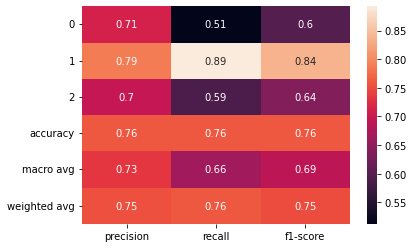

In [35]:
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1,:].T, annot=True)

<AxesSubplot:>

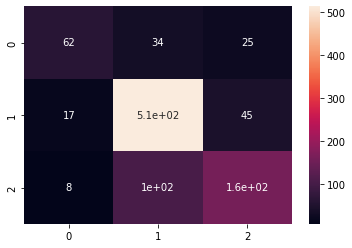

In [36]:
sns.heatmap(confusion_matrix(val_labels, y_test_pred), annot=True)

# Perofming our model on test set

In [37]:
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 

class LemmaTokenizer(object):
    
    def __init__(self):
        self.wnl = WordNetLemmatizer()
        
    def __call__(self, Sentence):
        return [self.wnl.lemmatize(self.wnl.lemmatize(self.wnl.lemmatize(tok, pos='n'), pos='v'), pos='a') for tok in word_tokenize(Sentence)]
    
vectorizer = CountVectorizer(tokenizer=LemmaTokenizer())

vectorizer.fit(train_sentences)
X_train = vectorizer.transform(train_sentences)
X_test = vectorizer.transform(test_sentences)

# Print out some of the features in the vocabulary:
print(list(vectorizer.vocabulary_)[:20])

C:\Users\Lakshmikanth Loya\anaconda3\envs\data_analytics\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


['finnish', 'electronics', 'contract', 'manufacturer', 'scanfil', 'have', 'net', 'sale', 'of', 'eur', '52.2', 'mn', 'in', 'the', 'first', 'quarter', '2007', ',', 'down', 'from']


In [38]:
print(X_test)

  (0, 30)	1
  (0, 57)	1
  (0, 653)	1
  (0, 1315)	1
  (0, 1596)	1
  (0, 2282)	1
  (0, 2956)	1
  (0, 3252)	1
  (0, 3317)	1
  (0, 3382)	1
  (0, 3560)	1
  (0, 3798)	2
  (0, 3886)	1
  (0, 4355)	1
  (0, 4462)	1
  (0, 4652)	1
  (0, 4982)	1
  (0, 5227)	1
  (0, 6701)	2
  (0, 6800)	1
  (1, 57)	1
  (1, 173)	1
  (1, 610)	1
  (1, 618)	1
  (1, 787)	1
  :	:
  (969, 57)	1
  (969, 215)	1
  (969, 238)	1
  (969, 1315)	1
  (969, 1329)	1
  (969, 1362)	1
  (969, 1540)	2
  (969, 1793)	2
  (969, 2004)	1
  (969, 2282)	1
  (969, 2865)	1
  (969, 2956)	1
  (969, 3232)	1
  (969, 4454)	1
  (969, 4492)	1
  (969, 4671)	1
  (969, 5183)	1
  (969, 5953)	1
  (969, 6046)	1
  (969, 6105)	1
  (969, 6545)	1
  (969, 6701)	1
  (969, 7254)	1
  (969, 7286)	1
  (969, 7354)	1


In [39]:
logreg= LogisticRegression()
logreg.fit(X_train, train_labels)

y_test_pred = logreg.predict(X_test)

target_names = ['class 0', 'class 1', 'class 2']

acc = accuracy_score(test_labels, y_test_pred)
print(f'Accuracy = {acc}')

prec = precision_score(test_labels, y_test_pred, average='macro')
print(f'Precision (macro average) = {prec}')

rec = recall_score(test_labels, y_test_pred, average='macro')
print(f'Recall (macro average) = {rec}')

f1 = f1_score(test_labels, y_test_pred, average='macro')
print(f'F1 score (macro average) = {f1}')
clf_report= classification_report(test_labels, y_test_pred, output_dict=True)
print(classification_report( test_labels , y_test_pred, target_names = target_names  ))

Accuracy = 0.765979381443299
Precision (macro average) = 0.7448713894159815
Recall (macro average) = 0.7051946370128189
F1 score (macro average) = 0.7224919101071005
              precision    recall  f1-score   support

     class 0       0.75      0.63      0.68       121
     class 1       0.80      0.86      0.83       576
     class 2       0.69      0.63      0.66       273

    accuracy                           0.77       970
   macro avg       0.74      0.71      0.72       970
weighted avg       0.76      0.77      0.76       970



C:\Users\Lakshmikanth Loya\anaconda3\envs\data_analytics\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

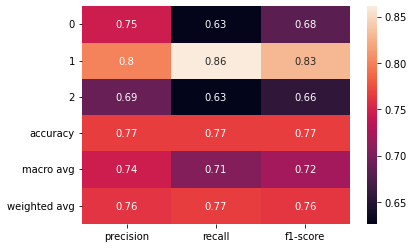

In [40]:
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1,:].T, annot=True)

<AxesSubplot:>

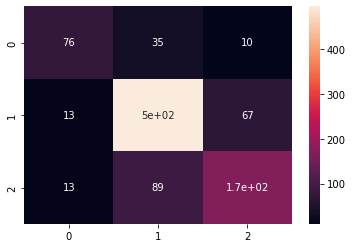

In [41]:
sns.heatmap(confusion_matrix(test_labels, y_test_pred), annot=True)

# N-grams

## Single tokens and Bigrams

In [42]:
vectorizer = CountVectorizer(tokenizer=Tokenizer(), ngram_range=(1,2))

vectorizer.fit(train_sentences)
X_train = vectorizer.transform(train_sentences)
X_test = vectorizer.transform(val_sentences)


# Print out some of the features in the vocabulary:
print(list(vectorizer.vocabulary_)[:20])

C:\Users\Lakshmikanth Loya\anaconda3\envs\data_analytics\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


['finnish', 'electronics', 'contract', 'manufacturer', 'scanfil', 'had', 'net', 'sales', 'of', 'eur', '52.2', 'mn', 'in', 'the', 'first', 'quarter', '2007', ',', 'down', 'from']


In [43]:
logreg= LogisticRegression()
logreg.fit(X_train, train_labels)
y_test_pred = logreg.predict(X_test)
target_names = ['class 0', 'class 1', 'class 2']

acc = accuracy_score(val_labels, y_test_pred)
print(f'Accuracy = {acc}')

prec = precision_score(val_labels, y_test_pred, average='macro')
print(f'Precision (macro average) = {prec}')

rec = recall_score(val_labels, y_test_pred, average='macro')
print(f'Recall (macro average) = {rec}')

f1 = f1_score(val_labels, y_test_pred, average='macro')
print(f'F1 score (macro average) = {f1}')
clf_report= classification_report(val_labels, y_test_pred, output_dict=True)
print(classification_report( val_labels , y_test_pred, target_names = target_names  ))

Accuracy = 0.7616099071207431
Precision (macro average) = 0.7486157660287014
Recall (macro average) = 0.6287906921262536
F1 score (macro average) = 0.6646096553805462
              precision    recall  f1-score   support

     class 0       0.74      0.40      0.52       121
     class 1       0.77      0.94      0.85       576
     class 2       0.73      0.54      0.62       272

    accuracy                           0.76       969
   macro avg       0.75      0.63      0.66       969
weighted avg       0.76      0.76      0.74       969



C:\Users\Lakshmikanth Loya\anaconda3\envs\data_analytics\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

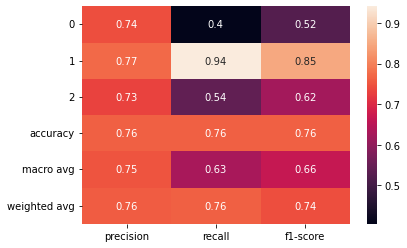

In [44]:
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1,:].T, annot=True)

<AxesSubplot:>

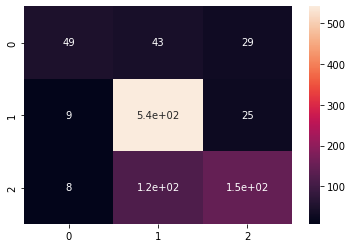

In [45]:
sns.heatmap(confusion_matrix(val_labels, y_test_pred), annot=True)

# 5.  Lexicon Features



The NLTK library contains sentiment lexicons, which are lists of words with negative or positive connotations. 

In [46]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

analyser = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to C:\Users\Lakshmikanth
[nltk_data]     Loya\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [47]:
testwords = ['happy', 'wonderful', 'horrible', 'basic', 'arrogant', 'not', 'sad']

for word in testwords:
    if word in analyser.lexicon:
        print(f'{word}: {analyser.lexicon[word]}')
    else:
        print(f'{word}: NOT IN LEXICON')

happy: 2.7
wonderful: 2.7
horrible: -2.5
basic: NOT IN LEXICON
arrogant: -2.2
not: NOT IN LEXICON
sad: -2.1


Now we would like to use this function to compute counts of all positive and negative words. Let's start by recording whether the words in our vocabulary are positive or negative:

In [48]:
import numpy as np
# get the Vader lexicon scores for each word in our vocabulary
vectorizer = CountVectorizer(tokenizer=Tokenizer())

vectorizer.fit(train_sentences)
X_train = vectorizer.transform(train_sentences)
X_test = vectorizer.transform(val_sentences)

# Print out some of the features in the vocabulary:
print(list(vectorizer.vocabulary_)[:20])

vocabulary = vectorizer.vocabulary_

lex_pos_scores = np.zeros((1, len(vocabulary)))
lex_neg_scores = np.zeros((1, len(vocabulary)))

for i, term in enumerate(vocabulary):
    if term in analyser.lexicon and analyser.lexicon[term] > 0:
        lex_pos_scores[0, i] = 1
    elif term in analyser.lexicon and analyser.lexicon[term] < 0:
        lex_neg_scores[0, i] = 1

C:\Users\Lakshmikanth Loya\anaconda3\envs\data_analytics\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


['finnish', 'electronics', 'contract', 'manufacturer', 'scanfil', 'had', 'net', 'sales', 'of', 'eur', '52.2', 'mn', 'in', 'the', 'first', 'quarter', '2007', ',', 'down', 'from']


In [49]:
# Compute the scores for each instance in the data set. 

# Multiply the lexicon scores by the feature vectors, then sum over the 
# vocabulary to get the total positive and total negative counts:
lex_pos_train = np.sum(X_train.multiply(lex_pos_scores), axis=1)
lex_pos_test = np.sum(X_test.multiply(lex_pos_scores), axis=1)

lex_neg_train = np.sum(X_train.multiply(lex_neg_scores), axis=1)
lex_neg_test = np.sum(X_test.multiply(lex_neg_scores), axis=1)

In [50]:
from scipy.sparse import hstack

X_train = hstack((X_train, lex_pos_train, lex_neg_train))
X_test = hstack((X_test, lex_pos_test, lex_neg_test))

In [51]:
classifier = LogisticRegression()
classifier.fit(X_train, train_labels)
y_test_pred = classifier.predict(X_test)

acc = accuracy_score(val_labels, y_test_pred)
print(f'Accuracy = {acc}')

prec = precision_score(val_labels, y_test_pred, average='macro')
print(f'Precision (macro average) = {prec}')

rec = recall_score(val_labels, y_test_pred, average='macro')
print(f'Recall (macro average) = {rec}')

f1 = f1_score(val_labels, y_test_pred, average='macro')
print(f'F1 score (macro average) = {f1}')
clf_report= classification_report(val_labels, y_test_pred, output_dict=True)
print(classification_report(val_labels, y_test_pred))

Accuracy = 0.7574819401444789
Precision (macro average) = 0.7378423423974896
Recall (macro average) = 0.6603507220151604
F1 score (macro average) = 0.6888435424642564
              precision    recall  f1-score   support

           0       0.75      0.50      0.60       121
           1       0.79      0.89      0.84       576
           2       0.67      0.58      0.62       272

    accuracy                           0.76       969
   macro avg       0.74      0.66      0.69       969
weighted avg       0.75      0.76      0.75       969



C:\Users\Lakshmikanth Loya\anaconda3\envs\data_analytics\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

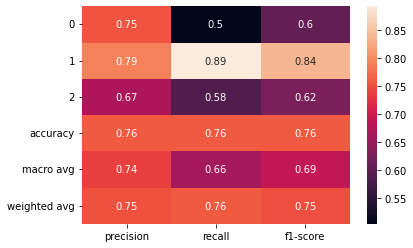

In [52]:
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1,:].T, annot=True)

<AxesSubplot:>

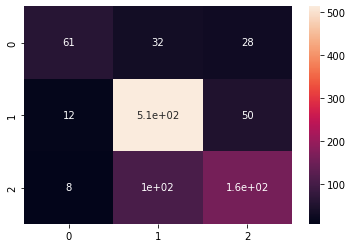

In [53]:
sns.heatmap(confusion_matrix(val_labels, y_test_pred), annot=True)

# SEC Filings

The data is provided in zipped text files. Unzip the file and place the 'SEC-filings' directory into the './data' directory. 

A related dataset in similar format is the conll2003 dataset, available from [HuggingFace](https://huggingface.co/datasets/conll2003). This could be used as a source of additional training data, but note it contains a different kind of text (different 'domain'). 

# 2.1

In [91]:
import re
import numpy as np

def read_sec_filings(split):
    # Use this function to load the SEC filings data from text files
    
    if split == 'train':
        with open('FIN5.txt', encoding='utf-8') as fp:
            lines = fp.readlines()
    else:
        with open('FIN3.txt', encoding='utf-8') as fp:
            lines = fp.readlines()
   
    # store the tokens and labels for all sentences
    sentences = []
    labels = []

    # the tokens and labels for the current sentence
    current_sen = []
    current_labels = []

    for i in range(2, len(lines)):
        # print(f'This is line {i}')
        # print(lines[i])

        if len(lines[i]) > 1:  # Line with some data on: The data consists of tokens and tags.
            data = re.split(' ', lines[i])  # tokenise the line
            # print(data)
            current_sen.append(data[0])  # append the token 
            
            # data[1] contains POS tags -- you can also use these in your model.
            
            current_labels.append(data[3].strip())  # append the NER tag
        elif len(current_sen) > 1:  # this marks the end of a sentence
            # end of sentence
            sentences.append(current_sen)  # save the tokens for this sentence
            current_sen = []  # reset

            labels.append(current_labels)  # save the tags for this sentence
            current_labels = []

    if len(current_sen) > 1:  # save the last sentence
        sentences.append(current_sen)
        labels.append(current_labels)
    
    print(f'Number of sentences loaded = {len(sentences)}')
    print(f'Number of unique labels: {np.unique(np.concatenate(labels))}')
                                      
    return sentences, labels

# 2.2

In [92]:
from sklearn.model_selection import train_test_split

print('Loading the original training set: ')
sentences_ner, labels_ner = read_sec_filings('train')

print('\nLoading the test set: ')
test_sentences_ner, test_labels_ner = read_sec_filings('test')

Loading the original training set: 
Number of sentences loaded = 1152
Number of unique labels: ['I-LOC' 'I-MISC' 'I-ORG' 'I-PER' 'O']

Loading the test set: 
Number of sentences loaded = 303
Number of unique labels: ['I-LOC' 'I-MISC' 'I-ORG' 'I-PER' 'O']


In [93]:
train_sentences_ner, val_sentences_ner, train_labels_ner, val_labels_ner = train_test_split(
    sentences_ner, 
    labels_ner, 
    test_size=0.2,
    random_state=42
    # stratify=labels_ner  # there are too few examples of some classes to stratify
)

print(f'Number of training sentences = {len(train_sentences_ner)}')
print(f'Number of validation sentences = {len(val_sentences_ner)}')

Number of training sentences = 921
Number of validation sentences = 231


In [94]:
#train_sentences_ner

# 2.3

# 2.3.1 NER with CRF

In [95]:
train_set = [list(zip( train_sentences_ner[i],train_labels_ner[i] ) ) for i in range(len(train_sentences_ner))]
test_set= [list(zip(val_sentences_ner[i],val_labels_ner[i]))for i in range(len(val_sentences_ner))]

In [96]:
train_set


[[('6', 'O'), ('AFFIRMATIVE', 'O'), ('COVENANTS', 'O')],
 [('9', 'O'),
  ('.', 'O'),
  ('3', 'O'),
  ('BANK', 'I-ORG'),
  ('EXPENSES', 'O'),
  ('.', 'O')],
 [('Lender', 'I-PER'),
  (':', 'O'),
  ('3', 'I-LOC'),
  ('/', 'I-LOC'),
  ('F', 'I-LOC'),
  ('Zhongdian', 'I-LOC'),
  ('Information', 'I-LOC'),
  ('Tower', 'I-LOC'),
  (',', 'O'),
  ('No', 'O'),
  ('.', 'O'),
  ('6', 'O'),
  ('Zhongguancun', 'I-LOC'),
  ('South', 'I-LOC'),
  ('Street', 'I-LOC'),
  (',', 'O'),
  ('Haidian', 'I-LOC'),
  ('District', 'I-LOC'),
  (',', 'O'),
  ('Beijing', 'I-LOC'),
  ('100086', 'I-LOC'),
  (',', 'O'),
  ('P', 'O'),
  ('.', 'O'),
  ('R', 'O'),
  ('.', 'O')],
 [('-', 'O'),
  ('6', 'O'),
  ('-', 'O'),
  ('consolidated', 'O'),
  ('operations', 'O'),
  ('during', 'O'),
  ('the', 'O'),
  ('period', 'O'),
  ('certified', 'O'),
  ('by', 'O'),
  ('a', 'O'),
  ('Responsible', 'O'),
  ('Officer', 'O'),
  ('and', 'O'),
  ('in', 'O'),
  ('a', 'O'),
  ('form', 'O'),
  ('acceptable', 'O'),
  ('to', 'O'),
  ('Agent', 

In [97]:
import nltk

# Train a CRF NER tagger
def train_CRF_NER_tagger(train_set):
    ### WRITE YOUR OWN CODE HERE
    tagger = nltk.tag.CRFTagger()
    tagger.train(train_set, 'model.crf.tagger')
    return tagger  # return the trained model

tagger = train_CRF_NER_tagger(train_set)

In [98]:
#val_sentences_ner

In [99]:
predicted_tags = tagger.tag_sents(val_sentences_ner)

Let's see how well the tagger is performing. In NER, we evaluate performance by finding correctly matched entities, rather than correctly tagged tokens. Only an exact entity match counts as correct. Therefore, we need to compute precision, recall and F1 score by computing true positives, false positives and false negatives by looking for the predicted entity spans and the gold-labelled entity spans in the test set.

The code below contains a function that extract a list of spans from the tagged sentences. The next function calls extract_spans() and computes the precision, recall and f1 scores. However, the function is incomplete.

Run the cal_span_level_F1() function below to compute span-level F1 scores for the predictions. Have a look at the results. Which types of entity are being recognised well and which are very poor?

In [100]:
#val_labels_ner

In [101]:
#predicted_tags

In [102]:
# val_labels_ner is an array of list of arrays, so we will concatinate it as one array 
flat_array_val= np.concatenate(val_labels_ner)

In [103]:
flat_array_val

array(['O', 'O', 'O', ..., 'O', 'O', 'O'], dtype='<U6')

In [104]:
#predicted_tags is an array of list of arrays so we will concatinate it as one array 
flat_array_predicted= np.concatenate(predicted_tags)

In [105]:
flat_array_predicted


array([['9', 'O'],
       ['.', 'O'],
       ['5', 'O'],
       ...,
       ['of', 'O'],
       ['Project', 'O'],
       ['.', 'O']], dtype='<U29')

In [106]:
flat_array_predicted[5][1]

'O'

In [107]:
# we want to get a classfication report of the labelling done in our model so we will append the labels of our predicated tags array "flat_array_predicted" into a new list.
compare_list=[]
for i in range(len(flat_array_predicted)):
       compare_list.append(flat_array_predicted[i][1])

In [108]:
#compare_list

C:\Users\Lakshmikanth Loya\anaconda3\envs\data_analytics\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lakshmikanth Loya\anaconda3\envs\data_analytics\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lakshmikanth Loya\anaconda3\envs\data_analytics\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

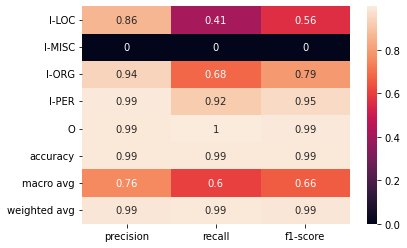

In [109]:

clf = classification_report(flat_array_val,compare_list,output_dict=True)

sns.heatmap(pd.DataFrame(clf).iloc[:-1,:].T, annot=True)
cm= confusion_matrix(flat_array_val, compare_list)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_ )
#disp.plot()
#plt.show()

In [110]:
clf

{'I-LOC': {'precision': 0.8611111111111112,
  'recall': 0.41333333333333333,
  'f1-score': 0.5585585585585585,
  'support': 75},
 'I-MISC': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 5},
 'I-ORG': {'precision': 0.9375,
  'recall': 0.6818181818181818,
  'f1-score': 0.7894736842105263,
  'support': 66},
 'I-PER': {'precision': 0.9929078014184397,
  'recall': 0.9150326797385621,
  'f1-score': 0.9523809523809524,
  'support': 153},
 'O': {'precision': 0.9894448788115715,
  'recall': 0.9990789473684211,
  'f1-score': 0.9942385753568154,
  'support': 7600},
 'accuracy': 0.9886061526775541,
 'macro avg': {'precision': 0.7561927582682244,
  'recall': 0.6018526284516996,
  'f1-score': 0.6589303541013705,
  'support': 7899},
 'weighted avg': {'precision': 0.9872331062056333,
  'recall': 0.9886061526775541,
  'f1-score': 0.9869508309249105,
  'support': 7899}}

In [111]:
def extract_spans_new(tagged_sents):
   
    """
    Extract a list of tagged spans for each named entity type,
    where each span is represented by a tuple containing the
    start token and end token indexes.
   
    returns: a dictionary containing a list of spans for each entity type.
    """
    spans = {}
   
    for sidx,sent in enumerate(tagged_sents):
         
        entity_type=None
        detected = False
        start = 0
        end = 0
       
        for tidx,(tok,lab) in enumerate(sent) :
            #print(tok, lab, detected)
            if detected == False and lab[0] == 'I':
               
                detected = True
                start = tidx
                entity_type=lab[2:]
               
            elif detected == True  and lab[0]=='I' and lab[2:] != entity_type:
               
                span = (start, tidx-1, sidx)
                if entity_type not in spans:
                    spans[entity_type] = []
                spans[entity_type].append(span)
                start = tidx
            elif detected == True and lab[0]=='O' :
               
                span = (start, tidx-1, sidx)
                detected = False
                if entity_type not in spans:
                    spans[entity_type] = []
                spans[entity_type].append(span)
       
               
           
               

        if detected == True :
            if entity_type not in spans:
                spans[entity_type] = []
           
            span = (start, len(sent)-1, sidx)
           
   
       
           
    if entity_type!= None :
        spans[entity_type].append((start, end, sidx))
        print(spans)
        #spans[entity_type].append((1, 2, 2))
       
           
       
               
               
    return spans
   


def cal_span_level_f1(test_sents, test_sents_with_pred):
    # get a list of spans from the test set labels
    gold_spans = extract_spans_new(test_sents)

    # get a list of spans predicted by our tagger
    pred_spans = extract_spans_new(test_sents_with_pred)
   
   
    # compute the metrics for each class:
    f1_per_class = []
   
    ne_types = gold_spans.keys()  # get the list of named entity types (not the tags)
   
    for ne_type in ne_types:
        # compute the confusion matrix
        true_pos = 0
        false_pos = 0
       
        if ne_type not in pred_spans.keys():
           

            continue
           
        for span in pred_spans[ne_type]:
            if span in gold_spans[ne_type]:
                true_pos += 1
            else:
                false_pos += 1
               
        false_neg = 0
        for span in gold_spans[ne_type]:
            if span not in pred_spans[ne_type]:
                false_neg += 1
               
        if true_pos + false_pos == 0:
            precision = 0
        else:
            precision = true_pos / float(true_pos + false_pos)
           
        if true_pos + false_neg == 0:
            recall = 0
        else:
            recall = true_pos / float(true_pos + false_neg)
       
        if precision + recall == 0:
            f1 = 0
        else:
            f1 = 2 * precision * recall / (precision + recall)
           
        f1_per_class.append(f1)
        print(f'F1 score for class {ne_type} = {f1}')
   
       
    print(f'Macro-average f1 score = {np.mean(f1_per_class)}')

In [112]:
cal_span_level_f1(test_set, predicted_tags)

F1 score for class PER = 0.9681978798586572
F1 score for class ORG = 0.7647058823529413
F1 score for class LOC = 0.4545454545454545
Macro-average f1 score = 0.7291497389190177


# 2.3.2 Custom CRF tagger

We can try to help the CRF tagger by adding some more features. Part-of-speech tags often provide useful information for identifying entites. The code below defines a modified CRFTagger class that overwrites the ```_get_features()``` method, which extracts the features from the tokens. 


In [113]:
import re, unicodedata

class CustomCRFTagger(nltk.tag.CRFTagger):
    _current_tokens = None
    
    def _get_features(self, tokens, idx):
            """
            Extract basic features about this word including
                - Current word
                - is it capitalized?
                - Does it have punctuation?
                - Does it have a number?
                - Suffixes up to length 3

            Note that : we might include feature over previous word, next word etc.

            :return: a list which contains the features
            :rtype: list(str)
            """
            token = tokens[idx]

            feature_list = []

            if not token:
                return feature_list

            # Capitalization
            if token[0].isupper():
                feature_list.append("CAPITALIZATION")

            # Number
            if re.search(self._pattern, token) is not None:
                feature_list.append("HAS_NUM")

            # Punctuation
            punc_cat = {"Pc", "Pd", "Ps", "Pe", "Pi", "Pf", "Po"}
            if all(unicodedata.category(x) in punc_cat for x in token):
                feature_list.append("PUNCTUATION")

            # Suffix up to length 3
            if len(token) > 1:
                feature_list.append("SUF_" + token[-1:])
            if len(token) > 2:
                feature_list.append("SUF_" + token[-2:])
            if len(token) > 3:
                feature_list.append("SUF_" + token[-3:])

                
            # Current word
            feature_list.append("WORD_" + token)
            
            ### WRITE YOUR OWN CODE HERE ###
            if idx > 0:
                feature_list.append("PREVWORD_" + tokens[idx-1])
            if idx < len(tokens)-1:
                feature_list.append("NEXTWORD_" + tokens[idx+1])
                
            ####

            return feature_list
                

In [114]:
# Train a CRF NER tagger
def train_CustomCRF_NER_tagger(train_set):
    ### WRITE YOUR OWN CODE HERE
    tagger = CustomCRFTagger()
    tagger.train(train_set, 'model.crf.tagger')
    return tagger  # return the trained model

tagger = train_CustomCRF_NER_tagger(train_set)

In [115]:
predicted_tags = tagger.tag_sents(val_sentences_ner)


In [116]:
# val_labels_ner is an array of list of arrays, so we will concatinate it as one array 
flat_array_val= np.concatenate(val_labels_ner)

#predicted_tags is an array of list of arrays so we will concatinate it as one array 
flat_array_predicted= np.concatenate(predicted_tags)

# we want to get a classfication report of the labelling done in our model so we will append the labels of our predicated tags array "flat_array_predicted" into a new list.
compare_list=[]
for i in range(len(flat_array_predicted)):
       compare_list.append(flat_array_predicted[i][1])
        


C:\Users\Lakshmikanth Loya\anaconda3\envs\data_analytics\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lakshmikanth Loya\anaconda3\envs\data_analytics\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lakshmikanth Loya\anaconda3\envs\data_analytics\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

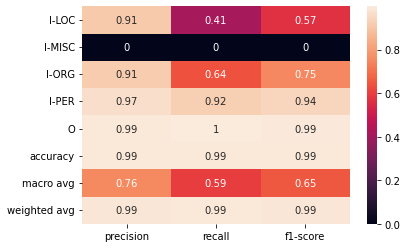

In [117]:
clf = classification_report(flat_array_val,compare_list,output_dict=True)
sns.heatmap(pd.DataFrame(clf).iloc[:-1,:].T, annot=True)
cm= confusion_matrix(flat_array_val, compare_list)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_ )
#disp.plot()
#plt.show()

In [118]:
cal_span_level_f1(test_set, predicted_tags)

F1 score for class PER = 0.9614035087719298
F1 score for class ORG = 0.7384615384615385
F1 score for class LOC = 0.5333333333333333
Macro-average f1 score = 0.7443994601889338


# POS tagging with NER

In [119]:
# *** Improve the CRF NER tagger using parts of speech (see lab 5) as additional features.
class CRFTaggerWithPOS(CustomCRFTagger):
    _current_tokens = None
    
    def _get_features(self, tokens, index):
        """
        Extract the features for a token and append the POS tag as an additional feature.
        """
        basic_features = super()._get_features(tokens, index)
        
        # Get the pos tags for the current sentence and save it
        if tokens != self._current_tokens:
            self._pos_tagged_tokens = nltk.pos_tag(tokens)
            self._current_tokens = tokens
            
            
        ### WRITE YOUR OWN CODE HERE
        basic_features.append(self._pos_tagged_tokens[index][1])
        ###
        
        return basic_features

In [120]:
import nltk
nltk.download('averaged_perceptron_tagger')
# Train a CRF NER tagger
def train_CRF_NER_tagger_with_POS(train_set):
    ### WRITE YOUR OWN CODE HERE
    tagger = CRFTaggerWithPOS()
    tagger.train(train_set, 'model.crf.tagger')
    return tagger  # return the trained model

tagger = train_CRF_NER_tagger_with_POS(train_set)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Lakshmikanth
[nltk_data]     Loya\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [121]:
predicted_tags = tagger.tag_sents(val_sentences_ner)

In [122]:
# val_labels_ner is an array of list of arrays, so we will concatinate it as one array 
flat_array_val= np.concatenate(val_labels_ner)

#predicted_tags is an array of list of arrays so we will concatinate it as one array 
flat_array_predicted= np.concatenate(predicted_tags)

# we want to get a classfication report of the labelling done in our model so we will append the labels of our predicated tags array "flat_array_predicted" into a new list.
compare_list=[]
for i in range(len(flat_array_predicted)):
       compare_list.append(flat_array_predicted[i][1])
        

C:\Users\Lakshmikanth Loya\anaconda3\envs\data_analytics\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lakshmikanth Loya\anaconda3\envs\data_analytics\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lakshmikanth Loya\anaconda3\envs\data_analytics\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

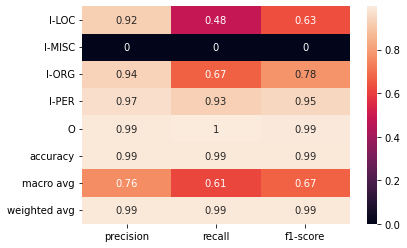

In [123]:
clf = classification_report(flat_array_val,compare_list,output_dict=True)
sns.heatmap(pd.DataFrame(clf).iloc[:-1,:].T, annot=True)
cm= confusion_matrix(flat_array_val, compare_list)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_ )
#disp.plot()
#plt.show()

In [124]:
cal_span_level_f1(test_set, predicted_tags)

F1 score for class PER = 0.965034965034965
F1 score for class ORG = 0.7878787878787878
F1 score for class LOC = 0.4888888888888889
Macro-average f1 score = 0.7472675472675472


# Applying NER on test set

In [133]:
test_sentences_ner

[['Subordinated',
  'Loan',
  'Agreement',
  '-',
  'Silicium',
  'de',
  'Provence',
  'SAS',
  'and',
  'Evergreen',
  'Solar',
  'Inc',
  '.',
  '7',
  '-',
  'December',
  '2007',
  '[',
  'HERBERT',
  'SMITH',
  'LOGO',
  ']',
  '................................',
  '2007',
  'SILICIUM',
  'DE',
  'PROVENCE',
  'SAS',
  'and',
  'EVERGREEN',
  'SOLAR',
  ',',
  'INC',
  '.'],
 ['SUBORDINATED',
  'LOAN',
  'AGREEMENT',
  'HERBERT',
  'SMITH',
  'LLP',
  'Page',
  '1',
  'of',
  '12',
  '7',
  '-',
  'December',
  '2007',
  'TABLE',
  'OF',
  'CONTENTS',
  'Clause',
  'Headings',
  'Page',
  '1',
  '.'],
 ['INTERPRETATION', '3', '2', '.'],
 ['LOAN', '4', '3', '.'],
 ['INTEREST', 'AND', 'REDEMPTION', '4', '4', '.'],
 ['EARLY', 'REDEMPTIONS', '5', '5', '.'],
 ['REPRESENTATIONS', '5', '6', '.'],
 ['UNDERTAKINGS', '5', '7', '.'],
 ['SUBORDINATION', '6', '8', '.'],
 ['COSTS', '6', '9', '.'],
 ['PARTIAL', 'PAYMENTS', '6', '10', '.'],
 ['ASSIGNMENT', '7', '11', '.'],
 ['WHOLE', 'AGREEMENT'

In [139]:
test_set_1= [list(zip(test_sentences_ner[i],test_labels_ner[i]))for i in range(len(test_sentences_ner))]

In [125]:
predicted_tags = tagger.tag_sents(test_sentences_ner)

In [126]:
# val_labels_ner is an array of list of arrays, so we will concatinate it as one array 
flat_array_val= np.concatenate(test_labels_ner)

#predicted_tags is an array of list of arrays so we will concatinate it as one array 
flat_array_predicted= np.concatenate(predicted_tags)

# we want to get a classfication report of the labelling done in our model so we will append the labels of our predicated tags array "flat_array_predicted" into a new list.
compare_list=[]
for i in range(len(flat_array_predicted)):
       compare_list.append(flat_array_predicted[i][1])
        

C:\Users\Lakshmikanth Loya\anaconda3\envs\data_analytics\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lakshmikanth Loya\anaconda3\envs\data_analytics\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lakshmikanth Loya\anaconda3\envs\data_analytics\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

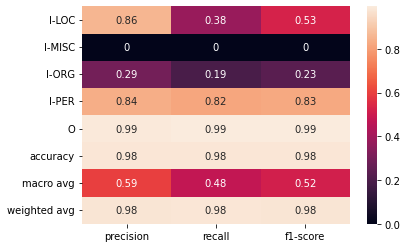

In [127]:
clf = classification_report(flat_array_val,compare_list,output_dict=True)
sns.heatmap(pd.DataFrame(clf).iloc[:-1,:].T, annot=True)
cm= confusion_matrix(flat_array_val, compare_list)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_ )
#disp.plot()
#plt.show()

In [140]:
cal_span_level_f1(test_set_1, predicted_tags)

{'ORG': [(4, 7, 0), (9, 11, 0), (24, 27, 0), (29, 30, 0), (28, 30, 18), (88, 91, 18), (26, 26, 30), (89, 89, 30), (7, 7, 61), (25, 27, 63), (14, 17, 119), (40, 43, 119), (6, 9, 121), (11, 14, 121), (28, 30, 121), (32, 32, 121), (34, 37, 121), (62, 64, 121), (66, 66, 121), (91, 94, 121), (4, 4, 123), (6, 8, 123), (6, 6, 124), (71, 71, 124), (73, 74, 124), (77, 77, 124), (36, 36, 154), (5, 5, 158), (30, 30, 175), (63, 63, 179), (91, 91, 180), (1, 3, 252), (5, 5, 252), (136, 139, 252), (147, 152, 252), (179, 182, 252), (3, 4, 254), (13, 14, 254), (23, 24, 256), (33, 33, 256), (41, 41, 256), (3, 3, 257), (37, 37, 257), (6, 6, 258), (2, 2, 259), (1, 1, 274), (18, 18, 274), (9, 9, 275), (21, 21, 275), (55, 55, 279), (70, 70, 279), (13, 13, 292), (50, 50, 292), (8, 8, 299), (51, 52, 301)], 'PER': [(18, 19, 0), (3, 4, 1), (73, 74, 18), (82, 82, 18), (133, 134, 18), (142, 142, 18), (6, 6, 19), (3, 3, 20), (5, 5, 20), (3, 3, 21), (5, 5, 21), (13, 13, 21), (24, 24, 21), (27, 27, 21), (33, 33, 21)

In [135]:
predicted_tags

[[('Subordinated', 'O'),
  ('Loan', 'O'),
  ('Agreement', 'O'),
  ('-', 'O'),
  ('Silicium', 'O'),
  ('de', 'O'),
  ('Provence', 'O'),
  ('SAS', 'O'),
  ('and', 'O'),
  ('Evergreen', 'O'),
  ('Solar', 'O'),
  ('Inc', 'O'),
  ('.', 'O'),
  ('7', 'O'),
  ('-', 'O'),
  ('December', 'O'),
  ('2007', 'O'),
  ('[', 'O'),
  ('HERBERT', 'O'),
  ('SMITH', 'O'),
  ('LOGO', 'O'),
  (']', 'O'),
  ('................................', 'O'),
  ('2007', 'O'),
  ('SILICIUM', 'O'),
  ('DE', 'O'),
  ('PROVENCE', 'O'),
  ('SAS', 'O'),
  ('and', 'O'),
  ('EVERGREEN', 'O'),
  ('SOLAR', 'O'),
  (',', 'O'),
  ('INC', 'O'),
  ('.', 'O')],
 [('SUBORDINATED', 'O'),
  ('LOAN', 'O'),
  ('AGREEMENT', 'O'),
  ('HERBERT', 'O'),
  ('SMITH', 'O'),
  ('LLP', 'O'),
  ('Page', 'O'),
  ('1', 'O'),
  ('of', 'O'),
  ('12', 'O'),
  ('7', 'O'),
  ('-', 'O'),
  ('December', 'O'),
  ('2007', 'O'),
  ('TABLE', 'O'),
  ('OF', 'O'),
  ('CONTENTS', 'O'),
  ('Clause', 'O'),
  ('Headings', 'O'),
  ('Page', 'O'),
  ('1', 'O'),
  ('.', 

In [137]:
test_sentences_ner

[['Subordinated',
  'Loan',
  'Agreement',
  '-',
  'Silicium',
  'de',
  'Provence',
  'SAS',
  'and',
  'Evergreen',
  'Solar',
  'Inc',
  '.',
  '7',
  '-',
  'December',
  '2007',
  '[',
  'HERBERT',
  'SMITH',
  'LOGO',
  ']',
  '................................',
  '2007',
  'SILICIUM',
  'DE',
  'PROVENCE',
  'SAS',
  'and',
  'EVERGREEN',
  'SOLAR',
  ',',
  'INC',
  '.'],
 ['SUBORDINATED',
  'LOAN',
  'AGREEMENT',
  'HERBERT',
  'SMITH',
  'LLP',
  'Page',
  '1',
  'of',
  '12',
  '7',
  '-',
  'December',
  '2007',
  'TABLE',
  'OF',
  'CONTENTS',
  'Clause',
  'Headings',
  'Page',
  '1',
  '.'],
 ['INTERPRETATION', '3', '2', '.'],
 ['LOAN', '4', '3', '.'],
 ['INTEREST', 'AND', 'REDEMPTION', '4', '4', '.'],
 ['EARLY', 'REDEMPTIONS', '5', '5', '.'],
 ['REPRESENTATIONS', '5', '6', '.'],
 ['UNDERTAKINGS', '5', '7', '.'],
 ['SUBORDINATION', '6', '8', '.'],
 ['COSTS', '6', '9', '.'],
 ['PARTIAL', 'PAYMENTS', '6', '10', '.'],
 ['ASSIGNMENT', '7', '11', '.'],
 ['WHOLE', 'AGREEMENT'

# conll2003 dataset

## Loading the data

## Splitting the data according to the data_loader_demo.ipynb

In [162]:
import re
import numpy as np

def read_conll2003_filings(split):
    # Use this function to load the SEC filings data from text files
    
    if split == 'train':
        with open('train.txt', encoding='utf-8') as fp:
            lines = fp.readlines()
    else:
        with open('test.txt', encoding='utf-8') as fp:
            lines = fp.readlines()
   
    # store the tokens and labels for all sentences
    sentences = []
    labels = []

    # the tokens and labels for the current sentence
    current_sen = []
    current_labels = []

    for i in range(2, len(lines)):
        # print(f'This is line {i}')
        # print(lines[i])

        if len(lines[i]) > 1:  # Line with some data on: The data consists of tokens and tags.
            data = re.split(' ', lines[i])  # tokenise the line
            # print(data)
            current_sen.append(data[0])  # append the token 
            
            # data[1] contains POS tags -- you can also use these in your model.
            
            current_labels.append(data[3].strip())  # append the NER tag
        elif len(current_sen) > 1:  # this marks the end of a sentence
            # end of sentence
            sentences.append(current_sen)  # save the tokens for this sentence
            current_sen = []  # reset

            labels.append(current_labels)  # save the tags for this sentence
            current_labels = []

    if len(current_sen) > 1:  # save the last sentence
        sentences.append(current_sen)
        labels.append(current_labels)
    
    print(f'Number of sentences loaded = {len(sentences)}')
    print(f'Number of unique labels: {np.unique(np.concatenate(labels))}')
                                      
    return sentences, labels

In [163]:
from sklearn.model_selection import train_test_split

print('Loading the original training set: ')
sentences_ner, labels_ner = read_conll2003_filings('train')

print('\nLoading the test set: ')
test_sentences_ner, test_labels_ner = read_conll2003_filings('test')

Loading the original training set: 
Number of sentences loaded = 13879
Number of unique labels: ['B-LOC' 'B-MISC' 'B-ORG' 'B-PER' 'I-LOC' 'I-MISC' 'I-ORG' 'I-PER' 'O']

Loading the test set: 
Number of sentences loaded = 3422
Number of unique labels: ['B-LOC' 'B-MISC' 'B-ORG' 'B-PER' 'I-LOC' 'I-MISC' 'I-ORG' 'I-PER' 'O']


In [164]:
train_sentences_ner, val_sentences_ner, train_labels_ner, val_labels_ner = train_test_split(
    sentences_ner, 
    labels_ner, 
    test_size=0.2,
    # stratify=labels_ner  # there are too few examples of some classes to stratify
)

print(f'Number of training sentences = {len(train_sentences_ner)}')
print(f'Number of validation sentences = {len(val_sentences_ner)}')

Number of training sentences = 11103
Number of validation sentences = 2776


In [165]:
train_sentences_ner

[['--', 'Budapest', 'newsroom', ',', '+361', '266', '2410'],
 ['------------------------',
  '6',
  '-',
  'Andre',
  'Agassi',
  '(',
  'U.S.',
  ')',
  'vs.',
  'Mauricio',
  'Hadad',
  '(',
  'Colombia',
  ')'],
 ['-',
  'Armed',
  'robbers',
  'pillaged',
  '70',
  'barrels',
  'of',
  'crude',
  'oil',
  'from',
  'a',
  'well',
  'near',
  'Gujar',
  'Khan',
  'on',
  'Wednesday',
  '.'],
 ['They',
  'said',
  'the',
  'index',
  'could',
  'also',
  'rise',
  'towards',
  '65,000',
  'if',
  'the',
  'cheap',
  'share',
  'prices',
  'attracted',
  'buyers',
  '.'],
 ['Group', 'pre-tax', 'profit', '188', 'vs', '160'],
 ['[', 'CORRECTED', '05:30', 'GMT', ']'],
 ['--', 'Sofia', 'Newsroom', ',', '359-2-84561'],
 ['Pakistan', 'at', 'Old', 'Trafford', 'on', 'Thursday', ':'],
 ['This',
  'would',
  'have',
  'cleared',
  'CNIEC',
  'a',
  'healthy',
  'profit',
  ',',
  'which',
  'could',
  'then',
  'have',
  'been',
  'used',
  'to',
  'finance',
  'storage',
  'and',
  'other',
  

## NER Tagging

In [166]:
ner_tag_mapping = {0: 'O', 1:'B-PER', 2:'I-PER', 3:'B-ORG', 4:'I-ORG', 5:'B-LOC', 6:'I-LOC', 7:'B-MISC', 8:'I-MISC'}

In [167]:
train_set = [list(zip( train_sentences_ner[i],train_labels_ner[i] ) ) for i in range(len(train_sentences_ner))]
test_set= [list(zip(val_sentences_ner[i],val_labels_ner[i]))for i in range(len(val_sentences_ner))]

In [168]:
train_set

[[('--', 'O'),
  ('Budapest', 'B-LOC'),
  ('newsroom', 'O'),
  (',', 'O'),
  ('+361', 'O'),
  ('266', 'O'),
  ('2410', 'O')],
 [('------------------------', 'O'),
  ('6', 'O'),
  ('-', 'O'),
  ('Andre', 'B-PER'),
  ('Agassi', 'I-PER'),
  ('(', 'O'),
  ('U.S.', 'B-LOC'),
  (')', 'O'),
  ('vs.', 'O'),
  ('Mauricio', 'B-PER'),
  ('Hadad', 'I-PER'),
  ('(', 'O'),
  ('Colombia', 'B-LOC'),
  (')', 'O')],
 [('-', 'O'),
  ('Armed', 'O'),
  ('robbers', 'O'),
  ('pillaged', 'O'),
  ('70', 'O'),
  ('barrels', 'O'),
  ('of', 'O'),
  ('crude', 'O'),
  ('oil', 'O'),
  ('from', 'O'),
  ('a', 'O'),
  ('well', 'O'),
  ('near', 'O'),
  ('Gujar', 'B-LOC'),
  ('Khan', 'I-LOC'),
  ('on', 'O'),
  ('Wednesday', 'O'),
  ('.', 'O')],
 [('They', 'O'),
  ('said', 'O'),
  ('the', 'O'),
  ('index', 'O'),
  ('could', 'O'),
  ('also', 'O'),
  ('rise', 'O'),
  ('towards', 'O'),
  ('65,000', 'O'),
  ('if', 'O'),
  ('the', 'O'),
  ('cheap', 'O'),
  ('share', 'O'),
  ('prices', 'O'),
  ('attracted', 'O'),
  ('buyers', '

## Applying CRF to the data

In [169]:

tagger_col = train_CRF_NER_tagger(train_set)

In [170]:
predicted_tags_col = tagger_col.tag_sents(val_sentences_ner)

In [171]:
def extract_spans(tagged_sents):
    """
    Extract a list of tagged spans for each named entity type, 
    where each span is represented by a tuple containing the 
    start token and end token indexes.
    
    returns: a dictionary containing a list of spans for each entity type.
    """
    spans = {}
        
    for sidx, sent in enumerate(tagged_sents):
        start = -1
        entity_type = None
        for i, (tok, lab) in enumerate(sent):
            if 'B-' in lab:
                start = i
                end = i + 1
                entity_type = lab[2:]
            elif 'I-' in lab:
                end = i + 1
            elif lab == 'O' and start >= 0:
                
                if entity_type not in spans:
                    spans[entity_type] = []
                
                spans[entity_type].append((start, end, sidx))
                start = -1
                
    return spans


def cal_span_level_f1(test_sents, test_sents_with_pred):
    # get a list of spans from the test set labels
    gold_spans = extract_spans(test_sents)

    # get a list of spans predicted by our tagger
    pred_spans = extract_spans(test_sents_with_pred)
    
    # compute the metrics for each class:
    f1_per_class = []
    
    ne_types = gold_spans.keys()  # get the list of named entity types (not the tags)
    
    for ne_type in ne_types:
        # compute the confusion matrix
        true_pos = 0
        false_pos = 0
        
        for span in pred_spans[ne_type]:
            if span in gold_spans[ne_type]:
                true_pos += 1
            else:
                false_pos += 1
                
        false_neg = 0
        for span in gold_spans[ne_type]:
            if span not in pred_spans[ne_type]:
                false_neg += 1
                
        if true_pos + false_pos == 0:
            precision = 0
        else:
            precision = true_pos / float(true_pos + false_pos)
            
        if true_pos + false_neg == 0:
            recall = 0
        else:
            recall = true_pos / float(true_pos + false_neg)
        
        if precision + recall == 0:
            f1 = 0
        else:
            f1 = 2 * precision * recall / (precision + recall)
            
        f1_per_class.append(f1)
        print(f'F1 score for class {ne_type} = {f1}')
        
    print(f'Macro-average f1 score = {np.mean(f1_per_class)}')

csp=cal_span_level_f1(test_set, predicted_tags_col)

F1 score for class PER = 0.8462537895192723
F1 score for class LOC = 0.8731762065095398
F1 score for class ORG = 0.7747899159663866
F1 score for class MISC = 0.8399311531841653
Macro-average f1 score = 0.833537766294841


In [172]:
####
#sns.heatmap(cal_span_level_f1(test_set, predicted_tags))
#cm= confusion_matrix(flat_array_val, compare_list)

## Custom CRF tagger 

In [173]:

tagger_col = train_CustomCRF_NER_tagger(train_set)

In [174]:
predicted_tags_col = tagger_col.tag_sents(val_sentences_ner)
cal_span_level_f1(test_set, predicted_tags_col)

F1 score for class PER = 0.8926261319534281
F1 score for class LOC = 0.9092245497978684
F1 score for class ORG = 0.849475890985325
F1 score for class MISC = 0.8526591107236269
Macro-average f1 score = 0.8759964208650621


## POS tagging with NER

In [175]:

tagger_col = train_CRF_NER_tagger_with_POS(train_set)

In [176]:
predicted_tags_col = tagger_col.tag_sents(val_sentences_ner)
cal_span_level_f1(test_set, predicted_tags_col)

F1 score for class PER = 0.8895522388059701
F1 score for class LOC = 0.9101576824349102
F1 score for class ORG = 0.8502495840266223
F1 score for class MISC = 0.8675324675324675
Macro-average f1 score = 0.8793729931999926


# NER on financial phrasebook

In [177]:
#train_sentences[2]

In [178]:
tokenizer=Tokenizer()
tokenised_list=[]
for i in train_sentences:
    tokenised_list.append(tokenizer(i))
    

In [261]:
tokenised_list

[['Finnish',
  'electronics',
  'contract',
  'manufacturer',
  'Scanfil',
  'had',
  'net',
  'sales',
  'of',
  'EUR',
  '52.2',
  'mn',
  'in',
  'the',
  'first',
  'quarter',
  'of',
  '2007',
  ',',
  'down',
  'from',
  'EUR',
  '60.1',
  'mn',
  'a',
  'year',
  'before',
  '.'],
 ['The',
  'agreement',
  'includes',
  'the',
  'entire',
  'process',
  'of',
  'managing',
  'Mercator',
  "'s",
  'supply',
  'chain',
  'in',
  'all',
  'regions',
  'where',
  'the',
  'company',
  'is',
  'currently',
  'present',
  '.'],
 ['The',
  'platen',
  'edges',
  'in',
  'contact',
  'with',
  'the',
  'band',
  'are',
  'provided',
  'with',
  'a',
  'seal',
  'having',
  'a',
  'protrusion',
  'directed',
  'towards',
  'the',
  'middle',
  'area',
  'of',
  'the',
  'platen',
  ',',
  'and',
  'means',
  'are',
  'provided',
  'to',
  'exert',
  'and',
  'maintain',
  'a',
  'pressure',
  'in',
  'the',
  'volume',
  'defined',
  'by',
  'the',
  'platen',
  ',',
  'the',
  'band',
 

In [180]:
#val_sentences

In [181]:

tokenised_list_val=[]
for i in val_sentences:
    tokenised_list_val.append(tokenizer(i))
    

In [182]:
#tokenised_list_val

In [183]:
predicted_tags = tagger.tag_sents(tokenised_list)


In [184]:
#predicted_tags


In [185]:
#predicted_tags is an array of list of arrays so we will concatinate it as one array 
flat_array_predicted= np.concatenate(predicted_tags)

# we want to get a classfication report of the labelling done in our model so we will append the labels of our predicated tags array "flat_array_predicted" into a new list.
compare_list=[]
for i in range(len(flat_array_predicted)):
       compare_list.append(flat_array_predicted[i][1])
        

## Sentiment score on NER tags

In [186]:
score_array= pd.DataFrame(flat_array_predicted)
score_array.columns=['Word','NER_Tags']

In [187]:
score_array[]

,Word,NER_Tags
0,Finnish,O
1,electronics,O
2,contract,O
3,manufacturer,O
4,Scanfil,O
...,...,...
66980,with,O
66981,its,O
66982,current,O
66983,ferries,O


In [188]:
score_array.NER_Tags = pd.Categorical(score_array.NER_Tags, 
                      categories=["I-LOC", "I-MISC" ,"I-ORG", "I-PER", "O"],
                      ordered=True)

In [189]:
score_array.sort_values('NER_Tags', inplace=True)


In [190]:
score_array

,Word,NER_Tags
18694,Unit,I-LOC
962,Tekla,I-LOC
29663,Technologies,I-LOC
29662,United,I-LOC
35800,Westpac,I-LOC
...,...,...
22653,information,O
22654,provided,O
22655,within,O
22625,the,O


In [191]:
coefficients_1 = pd.concat([pd.DataFrame(score_array.Word),pd.DataFrame((classifier.coef_))], axis = 1)
neg_1=list(zip(score_array.Word.tolist(),classifier.coef_[0]))
neu_1=list(zip(score_array.Word.tolist(),classifier.coef_[1]))   
pos_1=list(zip(score_array.Word.tolist(),classifier.coef_[2]))

In [264]:
pos_1

[('Unit', -0.12110997712311225),
 ('Tekla', -0.05201714052252484),
 ('Technologies', 0.3324120817070497),
 ('United', 0.21911158489589705),
 ('Westpac', 0.1726093951018147),
 ('Banking', -0.05585841192265466),
 ('Corp', -0.05585841192265466),
 ('Raiffeisen-Banking-Group', 0.033363236229415595),
 ('Austria', 0.07541683694281631),
 ('Sponda', -0.03752660688347427),
 ('Tamglass', 0.05534288896937503),
 ('Glass', 0.033666924202304806),
 ('Media', 0.006418448027256487),
 ('Gawker', 0.17916136554870069),
 ('Processing', 0.12103499480002679),
 ('Bothnia', 0.05562559164090587),
 ('News', -0.10794394695933554),
 ('Honkamaa', -0.029578964930545036),
 ('Structures', -0.12563825708906054),
 ('Corp', -0.13956828935265148),
 ("'s", -0.0037267191375228055),
 ('Otis', -0.034299252709759157),
 ('Solutions', -0.017149626354879578),
 ('Security', -0.13632436216326),
 ('Enterprise', -0.15471558654065862),
 ('Tectia', -0.08080007819343128),
 ('SSH', -0.016601284265515572),
 ('Port', -0.002956870456569175),

In [193]:
negative=[]
for i in range(len(neg_1)):
      negative.append(neg_1[i][1])
neutral=[]
for i in range(len(neu_1)):
      neutral.append(neu_1[i][1])
positive=[]
for i in range(len(pos_1)):
      positive.append(pos_1[i][1])

In [194]:
word=[]

for i in range(len(neg_1)):
      word.append(neg_1[i][0])


In [195]:
df_sentiment= pd.DataFrame(data=word)
df_sentiment['0']=negative
df_sentiment['1']=neutral
df_sentiment['2']=positive

In [196]:
df_sentiment

,0,0,1,2
0,Unit,-0.055261,0.176371,-0.121110
1,Tekla,0.248104,-0.196087,-0.052017
2,Technologies,0.188838,-0.521250,0.332412
3,United,0.118892,-0.338004,0.219112
4,Westpac,0.229559,-0.402169,0.172609
...,...,...,...,...
8745,manufacturing,-0.005133,0.029640,-0.024507
8746,in,-0.016468,0.041347,-0.024879
8747,13.1,-0.010497,-0.145398,0.155895
8748,a.m.,0.028908,0.056299,-0.085207


## Listing top 5 most positive and negative companies

In [197]:
df= score_array[score_array["NER_Tags"]=="I-ORG" ]

In [198]:
word=df['Word']

In [199]:

neg=list(zip(df.Word.tolist(),classifier.coef_[0]))
neu=list(zip(df.Word.tolist(),classifier.coef_[1]))   
pos=list(zip(df.Word.tolist(),classifier.coef_[2]))

In [200]:
negative=[]
for i in range(len(neg)):
      negative.append(neg[i][1])

In [201]:
neutral=[]
for i in range(len(neu)):
      neutral.append(neu[i][1])

In [202]:
positive=[]
for i in range(len(pos)):
      positive.append(pos[i][1])

In [203]:
df['0']= negative
df['1']= neutral
df['2']=positive

C:\Users\LAKSHM~1\AppData\Local\Temp/ipykernel_46920/1794407506.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['0']= negative
C:\Users\LAKSHM~1\AppData\Local\Temp/ipykernel_46920/1794407506.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['1']= neutral
C:\Users\LAKSHM~1\AppData\Local\Temp/ipykernel_46920/1794407506.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [204]:
df

,Word,NER_Tags,0,1,2
56333,OMX,I-ORG,-0.055261,0.176371,-0.121110
56332,NASDAQ,I-ORG,0.248104,-0.196087,-0.052017
24120,Patrick,I-ORG,0.188838,-0.521250,0.332412
56330,Market,I-ORG,0.118892,-0.338004,0.219112
24121,Jeambar,I-ORG,0.229559,-0.402169,0.172609
...,...,...,...,...,...
61333,Kesko,I-ORG,0.167280,-0.098129,-0.069151
22344,bank,I-ORG,-0.018517,-0.002942,0.021459
57026,York,I-ORG,-0.022475,-0.079793,0.102268
57025,New,I-ORG,-0.015651,-0.156935,0.172586


In [275]:
df_desc= df.sort_values(by="2", ascending=False)

In [276]:
df_desc.head()

,Word,NER_Tags,0,1,2
7654,AFX,I-ORG,-0.220889,-0.213002,0.433892
46065,AFX,I-ORG,-0.402506,-0.023313,0.425819
49089,Finnish,I-ORG,-0.273930,-0.098534,0.372464
62628,Norilsk,I-ORG,-0.053862,-0.315753,0.369615
16848,Equities,I-ORG,-0.248800,-0.095161,0.343961


In [209]:
result=pd.read_csv('result.csv')

In [210]:
result

,S.No,CRF method,F1 Score for I-LOC,F1 Score for I-MISC,F1 Score for I-ORG,F1 Score for I-PERS,F1 Score for O
0,1,Normal CRF,0.56,0,0.79,0.95,0.99
1,2,Custom CRF,0.57,0,0.75,0.94,0.99
2,3,CRF with POS tagging,0.63,0,0.78,0.95,0.99


In [277]:
df_desc= df.sort_values(by="0", ascending=False)

In [278]:
df_desc.head()

,Word,NER_Tags,0,1,2
61023,Limited,I-ORG,0.593452,-0.315231,-0.278221
60251,Corporation,I-ORG,0.519560,-0.188422,-0.331137
64844,Finland,I-ORG,0.492498,-0.290832,-0.201665
50083,Global,I-ORG,0.462013,-0.331868,-0.130146
61011,News,I-ORG,0.395597,-0.310690,-0.084907
